# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import scipy
from sklearn import datasets
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_graphviz


# Inspect Data

In [4]:
housing = pd.read_csv('train.csv')

In [21]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [15]:
housing.describe()
#shows some that already have missing values 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Dealing with Missing Values

In [10]:
housing.isnull().sum() != 0

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [26]:
a=pd.DataFrame(housing.isnull().sum())
a.sort_values(by=0,ascending=False)[:20]


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


Drop all missing value columns

In [35]:
dropped_housing = housing.drop(columns = ['PoolQC', 'MiscFeature','Alley', 'Fence','FireplaceQu', 'LotFrontage','GarageYrBlt','GarageType','BsmtFinType2','BsmtFinType1'], axis=1)
dropped_housing


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Drop all missing values from rows

In [38]:
clean_housing = dropped_housing.dropna(axis=0)
clean_housing

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Correlation with Sale Price

In [44]:
clean_housing.corr()['SalePrice']

Id              -0.031314
MSSubClass      -0.080337
LotArea          0.254608
OverallQual      0.783810
OverallCond     -0.109062
YearBuilt        0.504751
YearRemodAdd     0.501829
MasVnrArea       0.466294
BsmtFinSF1       0.360518
BsmtFinSF2      -0.028756
BsmtUnfSF        0.193327
TotalBsmtSF      0.600446
1stFlrSF         0.605139
2ndFlrSF         0.310355
LowQualFinSF    -0.010082
GrLivArea        0.711456
BsmtFullBath     0.210485
BsmtHalfBath    -0.030388
FullBath         0.569576
HalfBath         0.257232
BedroomAbvGr     0.169328
KitchenAbvGr    -0.111501
TotRmsAbvGrd     0.551753
Fireplaces       0.445634
GarageCars       0.640672
GarageArea       0.608124
WoodDeckSF       0.305023
OpenPorchSF      0.321866
EnclosedPorch   -0.127629
3SsnPorch        0.042025
ScreenPorch      0.096306
PoolArea         0.091763
MiscVal         -0.017058
MoSold           0.042508
YrSold          -0.019607
SalePrice        1.000000
Name: SalePrice, dtype: float64

Values sorted from highest correlation to lowest, to get an idea of 
which values affect the sale price the most

In [43]:
corr= clean_housing.corr()['SalePrice'].reset_index()
corr.sort_values('SalePrice',ascending=False)[:10]

,index,SalePrice
35,SalePrice,1.000000
3,OverallQual,0.783810
15,GrLivArea,0.711456
24,GarageCars,0.640672
25,GarageArea,0.608124
12,1stFlrSF,0.605139
11,TotalBsmtSF,0.600446
18,FullBath,0.569576
22,TotRmsAbvGrd,0.551753
5,YearBuilt,0.504751


Checking only numerical values higher than 0.3

In [42]:
num_corr = clean_housing.select_dtypes(include = 'number').columns[np.abs(clean_housing.corr()['SalePrice']) > 0.3]
num_corr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [45]:
best_corr= clean_housing[num_corr]
best_corr.corr()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
OverallQual,1.000000,0.571082,0.549829,0.401758,0.198599,0.505689,0.482581,0.280072,0.594239,0.580682,0.442913,0.377609,0.592564,0.530955,0.217590,0.306612,0.783810
YearBuilt,0.571082,1.000000,0.617415,0.299941,0.225093,0.385063,0.264236,0.006371,0.189204,0.487068,0.099588,0.111165,0.524602,0.444537,0.211576,0.216113,0.504751
YearRemodAdd,0.549829,0.617415,1.000000,0.168871,0.100543,0.265044,0.242481,0.119931,0.276611,0.460399,0.174794,0.090282,0.459966,0.386869,0.200425,0.230520,0.501829
MasVnrArea,0.401758,0.299941,0.168871,1.000000,0.253799,0.365700,0.341574,0.169019,0.391986,0.272688,0.289853,0.229661,0.364679,0.368050,0.148510,0.128395,0.466294
BsmtFinSF1,0.198599,0.225093,0.100543,0.253799,1.000000,0.505113,0.451045,-0.152593,0.202004,0.045882,0.046551,0.245691,0.199082,0.285615,0.186155,0.106671,0.360518
TotalBsmtSF,0.505689,0.385063,0.265044,0.365700,0.505113,1.000000,0.888263,-0.234802,0.456857,0.345148,0.295728,0.326893,0.455220,0.513394,0.209180,0.250525,0.600446
1stFlrSF,0.482581,0.264236,0.242481,0.341574,0.451045,0.888263,1.000000,-0.220822,0.554709,0.367905,0.393821,0.402155,0.441047,0.500820,0.232346,0.225815,0.605139
2ndFlrSF,0.280072,0.006371,0.119931,0.169019,-0.152593,-0.234802,-0.220822,1.000000,0.685427,0.418856,0.618932,0.188117,0.185864,0.123116,0.081724,0.203144,0.310355
GrLivArea,0.594239,0.189204,0.276611,0.391986,0.202004,0.456857,0.554709,0.685427,1.000000,0.625907,0.823494,0.458124,0.483599,0.477396,0.241117,0.341105,0.711456
FullBath,0.580682,0.487068,0.460399,0.272688,0.045882,0.345148,0.367905,0.418856,0.625907,1.000000,0.547617,0.238289,0.512811,0.425119,0.188995,0.284407,0.569576


**Heat Map for correlation of numerical values higher than 0.3 correlation to Sale Price**

<AxesSubplot:>

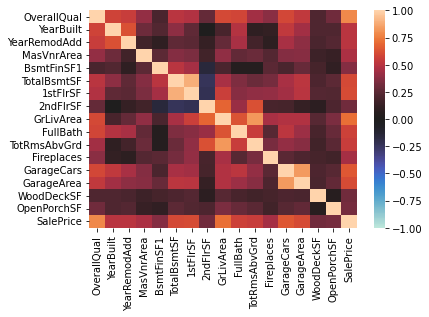

In [51]:
sns.heatmap(best_corr.corr(), vmin= -1, vmax= 1, center= 0)

**Heat Map for correlation of numerical values higher than 0.8 correlation to Sale Price to remove variables of multicollinearity**

<AxesSubplot:>

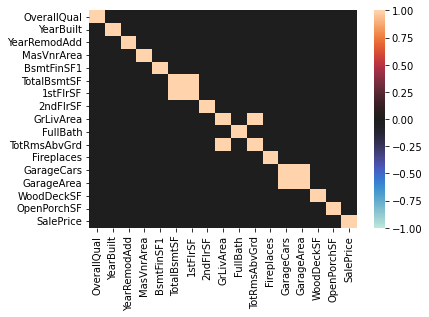

In [52]:
sns.heatmap(best_corr.corr()>.8,vmin = -1, vmax = 1, center=0)

Drop variables of multicollinearity

In [69]:
house_data = clean_housing.drop(columns = ['GrLivArea', 'TotalBsmtSF','GarageArea'], axis=1)
house_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [70]:

for i in house_data.columns:
    house_data[i].value_counts().iloc[0]
    print(house_data[i].value_counts().iloc[0]> house_data.shape[0]*0.7)

False
False
True
False
True
False
True
True
True
True
False
True
True
True
False
False
False
False
False
True
True
False
False
False
False
False
True
False
False
True
False
False
True
False
True
False
True
True
False
False
True
False
True
False
False
False
True
False
False
True
False
False
False
True
True
True
False
False
True
True
True
True
True
False
False
True
True
False


In [71]:
for i in house_data.columns:
    if house_data[i].value_counts().iloc[0]> house_data.shape[0]*0.7:
        house_data.drop(i, axis=1, inplace= True)

In [72]:
house_data

,Id,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,8450,Reg,CollgCr,2Story,7,5,2003,2003,...,Gd,8,0,RFn,2,0,61,2,2008,208500
1,2,20,9600,Reg,Veenker,1Story,6,8,1976,1976,...,TA,6,1,RFn,2,298,0,5,2007,181500
2,3,60,11250,IR1,CollgCr,2Story,7,5,2001,2002,...,Gd,6,1,RFn,2,0,42,9,2008,223500
3,4,70,9550,IR1,Crawfor,2Story,7,5,1915,1970,...,Gd,7,1,Unf,3,0,35,2,2006,140000
4,5,60,14260,IR1,NoRidge,2Story,8,5,2000,2000,...,Gd,9,1,RFn,3,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,Reg,Gilbert,2Story,6,5,1999,2000,...,TA,7,1,RFn,2,0,40,8,2007,175000
1456,1457,20,13175,Reg,NWAmes,1Story,6,6,1978,1988,...,TA,7,2,Unf,2,349,0,2,2010,210000
1457,1458,70,9042,Reg,Crawfor,2Story,7,9,1941,2006,...,Gd,9,2,RFn,1,0,60,5,2010,266500
1458,1459,20,9717,Reg,NAmes,1Story,5,6,1950,1996,...,Gd,5,0,Unf,1,366,0,4,2010,142125


# Linear Regression Model 

In [77]:
house_model = LinearRegression()

In [92]:
x_vars = house_data.select_dtypes(include = 'number')
X= x_vars.loc[:,x_vars.columns != 'SalePrice']
y= house_data['SalePrice']


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [94]:
house_model.fit(X_train, y_train)


LinearRegression()

Evaluate the model

In [95]:
predictions = house_model.predict(X_test)

**R2 Score**

In [97]:
score= r2_score(y_test, predictions)
score


0.7978134277266009

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


**Mean Squared Error Test**

In [99]:
rmse= np.sqrt(mean_squared_error(y_test, predictions))
rmse


38798.484884078105

# Decision Tree 

In [124]:
dt_fit = DecisionTreeRegressor(max_depth=4, min_samples_leaf =6)
dt_fit.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=6)

In [125]:
  dt_fit.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Evaluate the Model

In [126]:
predictions_dt= dt_fit.predict(X_test)
predictions_dt

array([150121.9017341 , 197354.16666667, 122497.19923372, 161446.73248408,
       122497.19923372, 150121.9017341 , 161446.73248408, 315832.71428571,
       161446.73248408, 161446.73248408, 194748.63316583, 122497.19923372,
       194748.63316583, 194748.63316583, 194748.63316583, 414217.        ,
       236060.29411765, 197354.16666667, 194748.63316583, 122497.19923372,
       194748.63316583, 122497.19923372, 150121.9017341 , 194748.63316583,
       161446.73248408, 150121.9017341 , 315832.71428571, 122497.19923372,
       122497.19923372, 332237.5       , 122497.19923372, 197354.16666667,
       122497.19923372, 122497.19923372, 194748.63316583, 194748.63316583,
       122497.19923372, 236060.29411765, 378782.        , 122497.19923372,
       161446.73248408, 122497.19923372, 244610.4137931 , 194748.63316583,
       414217.        , 197354.16666667, 122497.19923372, 194748.63316583,
       122497.19923372, 122497.19923372, 194748.63316583, 150121.9017341 ,
       122497.19923372, 2

In [127]:
pred_df= pd.DataFrame(predictions_dt)
pred_df

,0
0,150121.901734
1,197354.166667
2,122497.199234
3,161446.732484
4,122497.199234
...,...
263,161446.732484
264,194748.633166
265,194748.633166
266,122497.199234


**R2 Score**

In [130]:
score_dt= r2_score(y_test, predictions_dt)
score_dt

0.6322558016955941

**Mean Squared Error Test**

In [131]:
rmse= np.sqrt(mean_squared_error(y_test, predictions_dt))
rmse


52325.27583811715

# Understanding how the tests work:

In [133]:
#HOW TO

y_test

299     158500
452     204000
16      149000
442     162900
243     120000
         ...  
840     140000
792     269790
1197    144000
438      90350
1328    256000
Name: SalePrice, Length: 268, dtype: int64

In [102]:
how_to_table= pd.DataFrame(y_test)
how_to_table
#true variable in this table

,SalePrice
299,158500
452,204000
16,149000
442,162900
243,120000
...,...
840,140000
792,269790
1197,144000
438,90350


In [103]:
how_to_table['SalePricePred']= predictions
how_to_table

#table that shows the train vs test, the real versus the predicted
#and how close they are which means you have a good model

,SalePrice,SalePricePred
299,158500,153973.337419
452,204000,202986.233814
16,149000,179978.377322
442,162900,159200.601929
243,120000,116013.223697
...,...,...
840,140000,127316.044347
792,269790,244148.306582
1197,144000,153331.027834
438,90350,88383.506606


In [134]:
#The mean squared error test then takes the difference between
#these columns, gets the mean and then squares it.